# Pandas
> Pandas


In [ ]:
#| default_exp pandas

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
flights = (sns.load_dataset("flights"))
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
flights.head(), flights.tail()

(   year month  passengers
 0  1949   Jan         112
 1  1949   Feb         118
 2  1949   Mar         132
 3  1949   Apr         129
 4  1949   May         121,
      year month  passengers
 139  1960   Aug         606
 140  1960   Sep         508
 141  1960   Oct         461
 142  1960   Nov         390
 143  1960   Dec         432)

In [ ]:
 flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
flights.describe(include = "category")

,month
count,144
unique,12
top,Jan
freq,12


In [ ]:
flights.year.head(), flights['year'].head(), flights[['year', 'passengers']].head()

(0    1949
 1    1949
 2    1949
 3    1949
 4    1949
 Name: year, dtype: int64,
 0    1949
 1    1949
 2    1949
 3    1949
 4    1949
 Name: year, dtype: int64,
    year  passengers
 0  1949         112
 1  1949         118
 2  1949         132
 3  1949         129
 4  1949         121)

In [ ]:
flights.iloc[1]

year          1949
month          Feb
passengers     118
Name: 1, dtype: object

In [ ]:
flights.loc[1, 'year']

1949

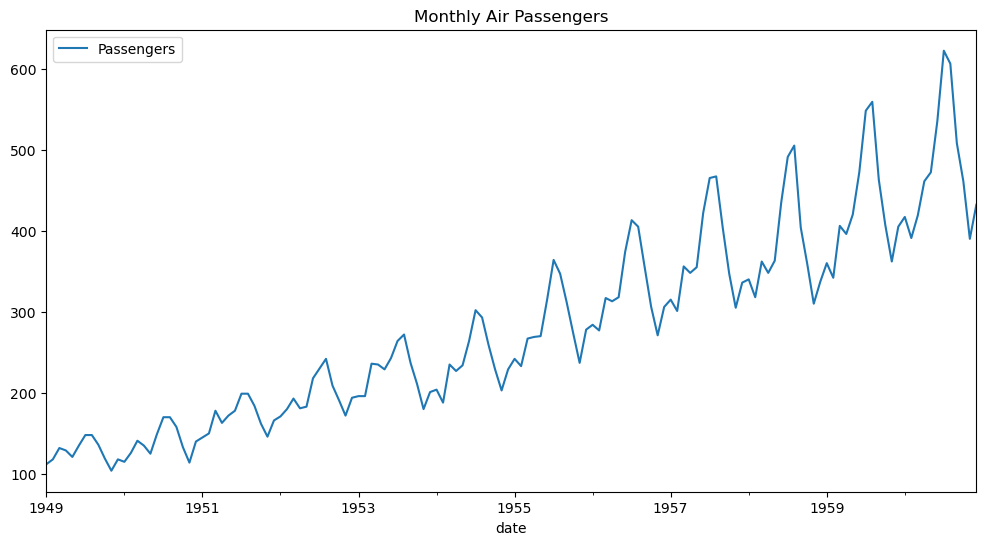

In [ ]:
# Convert month names to datetime format with the given year
flights['date'] = flights.apply(lambda row: pd.to_datetime(f"{row['year']}-{row['month']}-01"), axis=1)
flights.set_index('date', inplace=True)

# Drop redundant columns and rename the passengers column for clarity
flights.drop(['year', 'month'], axis=1, inplace=True)
flights.rename(columns={'passengers': 'Passengers'}, inplace=True)

# Plot the data
flights.plot(title="Monthly Air Passengers", figsize=(12,6))
plt.show()

In [ ]:
df = flights
df.head()

,Passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.columns

Index(['Passengers'], dtype='object')

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [ ]:
df["1960-08-01":"1960-12-01"]

,Passengers
date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
df.Passengers.resample('Y').mean()

date
1949-12-31    126.666667
1950-12-31    139.666667
1951-12-31    170.166667
1952-12-31    197.000000
1953-12-31    225.000000
1954-12-31    238.916667
1955-12-31    284.000000
1956-12-31    328.250000
1957-12-31    368.416667
1958-12-31    381.000000
1959-12-31    428.333333
1960-12-31    476.166667
Freq: A-DEC, Name: Passengers, dtype: float64

<Axes: xlabel='date'>

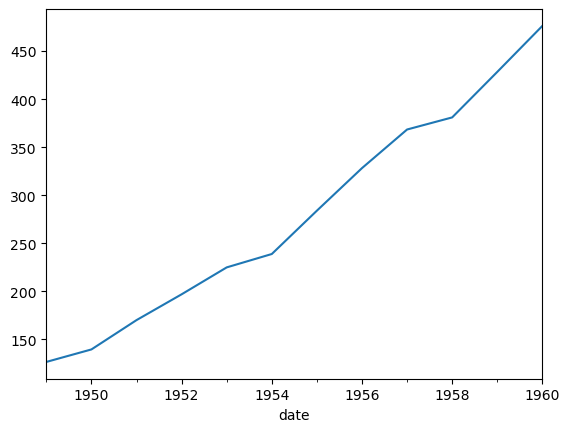

In [ ]:
df.Passengers.resample('Y').mean().plot()

In [ ]:
df = pd.read_csv("Data/aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


## Business Days

In [ ]:
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B')
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
df.set_index(rng, inplace=True)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


In [ ]:
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
daily_index.difference(df.index)

DatetimeIndex(['2016-06-04', '2016-06-05', '2016-06-11', '2016-06-12',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-06-26'],
              dtype='datetime64[ns]', freq=None)

### Benefits of having DatetimeIndex



<Axes: >

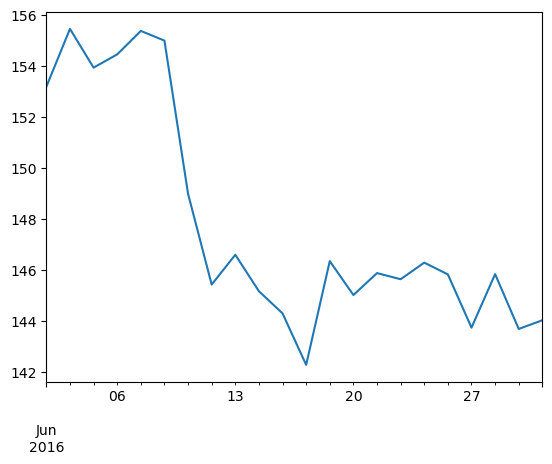

In [ ]:
%matplotlib inline
df.Close.plot()

In [ ]:
df["2016-06-01":"2016-06-10"].Close.mean()

152.72125

In [ ]:
df.index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
df.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [ ]:
df.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-12,145.74,146.09,142.51,145.42,72307330
2016-06-19,143.66,146.74,143.66,146.34,32541404
2016-06-26,147.17,148.28,145.38,145.82,25692361


### Generating DatetimeIndex with periods argument

In [ ]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

In [ ]:
import numpy as np
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ts.head(20)

2011-01-01 00:00:00    3
2011-01-01 01:00:00    9
2011-01-01 02:00:00    7
2011-01-01 03:00:00    9
2011-01-01 04:00:00    2
2011-01-01 05:00:00    8
2011-01-01 06:00:00    9
2011-01-01 07:00:00    5
2011-01-01 08:00:00    4
2011-01-01 09:00:00    6
2011-01-01 10:00:00    8
2011-01-01 11:00:00    8
2011-01-01 12:00:00    8
2011-01-01 13:00:00    7
2011-01-01 14:00:00    0
2011-01-01 15:00:00    1
2011-01-01 16:00:00    9
2011-01-01 17:00:00    0
2011-01-01 18:00:00    1
2011-01-01 19:00:00    5
Freq: H, dtype: int64

### Holidays

In [ ]:
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq='B')
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

### Using CustomBusinessDay to generate US holidays calendar frequency

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

### AbstractHolidayCalendar

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('4/1/2017','4/30/2017',freq=my_bday)

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19',
               '2017-04-20', '2017-04-21', '2017-04-24', '2017-04-25',
               '2017-04-26', '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', freq='C')

### CustomBusinessDay

In [ ]:
egypt_weekdays = "Sun Mon Tue Wed Thu"

b = CustomBusinessDay(weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27'],
              dtype='datetime64[ns]', freq='C')

In [ ]:
b = CustomBusinessDay(holidays=['2017-07-04', '2017-07-10'], weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-09', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='C')

### Maths

In [ ]:
from datetime import datetime
dt = datetime(2017,7,9)
dt

datetime.datetime(2017, 7, 9, 0, 0)

In [ ]:
dt + 1*b

Timestamp('2017-07-11 00:00:00')

## To datatime

In [ ]:
import pandas as pd
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates, format='mixed')

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt, format='mixed')

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

### European style dates with day first

In [ ]:
pd.to_datetime('30-12-2016', dayfirst=True)

Timestamp('2016-12-30 00:00:00')

In [ ]:
pd.to_datetime('5-1-2016', dayfirst=True)

Timestamp('2016-01-05 00:00:00')

### Custom date time format

In [ ]:
pd.to_datetime('2017$01$05', format='%Y$%m$%d')

Timestamp('2017-01-05 00:00:00')

In [ ]:
pd.to_datetime('2017#01#05', format='%Y#%m#%d')

Timestamp('2017-01-05 00:00:00')

### Handling invalid dates

In [ ]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')

Index(['2017-01-05', 'Jan 6, 2017', 'abc'], dtype='object')

In [ ]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

DatetimeIndex(['2017-01-05', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

## Epoch

In [ ]:
current_epoch = 1501324478
pd.to_datetime(current_epoch, unit='s')

Timestamp('2017-07-29 10:34:38')

In [ ]:
pd.to_datetime(current_epoch*1000, unit='ms')

Timestamp('2017-07-29 10:34:38')

In [ ]:
t = pd.to_datetime([current_epoch], unit='s')
t

DatetimeIndex(['2017-07-29 10:34:38'], dtype='datetime64[ns]', freq=None)

In [ ]:
t.view('int64')

array([1501324478000000000])

### Yearly Period


In [ ]:
import pandas as pd
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

In [ ]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [ ]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [ ]:
y.is_leap_year

True

### Monthly Period

In [ ]:
m = pd.Period('2017-12')
m

Period('2017-12', 'M')

In [ ]:
m.start_time

Timestamp('2017-12-01 00:00:00')

In [ ]:
m.end_time

Timestamp('2017-12-31 23:59:59.999999999')

In [ ]:
m+1

Period('2018-01', 'M')

### Daily Period

In [ ]:
d = pd.Period('2016-02-28', freq='D')
d                                                                                                             

Period('2016-02-28', 'D')

In [ ]:
d.start_time

Timestamp('2016-02-28 00:00:00')

In [ ]:
d.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [ ]:
d+1

Period('2016-02-29', 'D')

### Hourly Period

In [ ]:
h = pd.Period('2017-08-15 23:00:00',freq='H')
h

Period('2017-08-15 23:00', 'H')

In [ ]:
h+1

Period('2017-08-16 00:00', 'H')

In [ ]:
h+pd.offsets.Hour(1)

Period('2017-08-16 00:00', 'H')

### Quarterly Period 

In [ ]:
q1= pd.Period('2017Q1', freq='Q-JAN')
q1

Period('2017Q1', 'Q-JAN')

In [ ]:
q1.start_time

Timestamp('2016-02-01 00:00:00')

In [ ]:
q1.end_time

Timestamp('2016-04-30 23:59:59.999999999')

In [ ]:
q1.asfreq('M',how='start')

Period('2016-02', 'M')

In [ ]:
q1.asfreq('M',how='end')

Period('2016-04', 'M')

### Weekly Period


In [ ]:
w = pd.Period('2017-07-05',freq='W')
w

Period('2017-07-03/2017-07-09', 'W-SUN')

In [ ]:
w-1

Period('2017-06-26/2017-07-02', 'W-SUN')

In [ ]:
w2 = pd.Period('2017-08-15',freq='W')
w2

Period('2017-08-14/2017-08-20', 'W-SUN')

In [ ]:
w2-w

<6 * Weeks: weekday=6>

### PeriodIndex and period_range

In [ ]:
r = pd.period_range('2011', '2017', freq='q')
r

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]')

In [ ]:
r[0].start_time

Timestamp('2011-01-01 00:00:00')

In [ ]:
r[0].end_time

Timestamp('2011-03-31 23:59:59.999999999')

In [ ]:
idx = pd.period_range('2011', '2017', freq='q-jan')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]')

In [ ]:
r[0].start_time

Timestamp('2010-11-01 00:00:00')

In [ ]:
r[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [ ]:
r = pd.period_range(start='2016-01', periods=10, freq='M')
r

PeriodIndex(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10'],
            dtype='period[M]')

In [ ]:
import numpy as np
ps = pd.Series(np.random.randn(len(idx)), idx)
ps

2011Q4   -1.319511
2012Q1    1.006192
2012Q2    0.346173
2012Q3    0.053537
2012Q4   -0.262149
2013Q1   -0.515918
2013Q2    0.214142
2013Q3   -0.116696
2013Q4   -0.017913
2014Q1   -1.562546
2014Q2   -1.195709
2014Q3   -1.038669
2014Q4    0.629746
2015Q1   -0.050429
2015Q2   -0.021384
2015Q3   -2.150506
2015Q4   -0.372248
2016Q1   -0.470600
2016Q2   -0.201295
2016Q3   -0.150924
2016Q4    1.120095
2017Q1    1.591672
2017Q2   -0.231263
2017Q3   -0.353109
2017Q4   -1.364190
Freq: Q-JAN, dtype: float64

In [ ]:
ps['2016']

2016Q4    1.120095
2017Q1    1.591672
2017Q2   -0.231263
2017Q3   -0.353109
2017Q4   -1.364190
Freq: Q-JAN, dtype: float64

In [ ]:
ps['2016':'2017']

2016Q4    1.120095
2017Q1    1.591672
2017Q2   -0.231263
2017Q3   -0.353109
2017Q4   -1.364190
Freq: Q-JAN, dtype: float64

In [ ]:
pst = ps.to_timestamp()
pst

2010-11-01   -1.319511
2011-02-01    1.006192
2011-05-01    0.346173
2011-08-01    0.053537
2011-11-01   -0.262149
2012-02-01   -0.515918
2012-05-01    0.214142
2012-08-01   -0.116696
2012-11-01   -0.017913
2013-02-01   -1.562546
2013-05-01   -1.195709
2013-08-01   -1.038669
2013-11-01    0.629746
2014-02-01   -0.050429
2014-05-01   -0.021384
2014-08-01   -2.150506
2014-11-01   -0.372248
2015-02-01   -0.470600
2015-05-01   -0.201295
2015-08-01   -0.150924
2015-11-01    1.120095
2016-02-01    1.591672
2016-05-01   -0.231263
2016-08-01   -0.353109
2016-11-01   -1.364190
Freq: QS-NOV, dtype: float64

In [ ]:
pst.index

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01', '2013-05-01', '2013-08-01',
               '2013-11-01', '2014-02-01', '2014-05-01', '2014-08-01',
               '2014-11-01', '2015-02-01', '2015-05-01', '2015-08-01',
               '2015-11-01', '2016-02-01', '2016-05-01', '2016-08-01',
               '2016-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [ ]:
ps = pst.to_period()
ps

2010Q4   -1.319511
2011Q1    1.006192
2011Q2    0.346173
2011Q3    0.053537
2011Q4   -0.262149
2012Q1   -0.515918
2012Q2    0.214142
2012Q3   -0.116696
2012Q4   -0.017913
2013Q1   -1.562546
2013Q2   -1.195709
2013Q3   -1.038669
2013Q4    0.629746
2014Q1   -0.050429
2014Q2   -0.021384
2014Q3   -2.150506
2014Q4   -0.372248
2015Q1   -0.470600
2015Q2   -0.201295
2015Q3   -0.150924
2015Q4    1.120095
2016Q1    1.591672
2016Q2   -0.231263
2016Q3   -0.353109
2016Q4   -1.364190
Freq: Q-DEC, dtype: float64

In [ ]:
ps.index

PeriodIndex(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
             '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
             '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
             '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
             '2016Q4'],
            dtype='period[Q-DEC]')

## Processing Wal Mart's Financials

In [ ]:
import pandas as pd
df = pd.read_csv("Data/wmt.csv")
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [ ]:
df.set_index("Line Item",inplace=True)
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [ ]:
df.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [ ]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [ ]:
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]')

In [ ]:
df.index[0].start_time

Timestamp('2016-02-01 00:00:00')

### Add start date end date columns to dataframe

In [ ]:
df["Start Date"]=df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,Start Date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [ ]:
df["End Date"]=df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


## Timezone Handling

In [ ]:
import pandas as pd
df = pd.read_csv("Data/msft.csv", header=1,index_col='Date Time',parse_dates=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [ ]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [ ]:
df.tz_localize(tz='US/Eastern')
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [ ]:
df.index = df.index.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

### Convert to Berlin time using tz_convert

In [ ]:
df = df.tz_convert('Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [ ]:
df.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

In [ ]:
from pytz import all_timezones
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

### Convert to Mumbai time

In [ ]:
df.index = df.index.tz_convert('Asia/Calcutta') # tz database doesn't have any Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


### Using timezones in date_range

#### (1) timezone using pytz

In [ ]:
london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')
london

DatetimeIndex(['2012-03-06 00:09:00+00:00', '2012-03-06 01:09:00+00:00',
               '2012-03-06 02:09:00+00:00', '2012-03-06 03:09:00+00:00',
               '2012-03-06 04:09:00+00:00', '2012-03-06 05:09:00+00:00',
               '2012-03-06 06:09:00+00:00', '2012-03-06 07:09:00+00:00',
               '2012-03-06 08:09:00+00:00', '2012-03-06 09:09:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

#### (2) timezone using dateutil

In [ ]:
td = pd.date_range('3/6/2012 00:00', periods=10, freq='H',tz='dateutil/Europe/London')
td

DatetimeIndex(['2012-03-06 00:00:00+00:00', '2012-03-06 01:00:00+00:00',
               '2012-03-06 02:00:00+00:00', '2012-03-06 03:00:00+00:00',
               '2012-03-06 04:00:00+00:00', '2012-03-06 05:00:00+00:00',
               '2012-03-06 06:00:00+00:00', '2012-03-06 07:00:00+00:00',
               '2012-03-06 08:00:00+00:00', '2012-03-06 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('/usr/share/zoneinfo/Europe/London')]', freq='H')

### Airthmetic between different timezones

In [ ]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [ ]:
b = s.tz_localize(tz="Europe/Berlin")
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

In [ ]:
b.index

DatetimeIndex(['2017-08-22 09:00:00+02:00', '2017-08-22 09:30:00+02:00',
               '2017-08-22 10:00:00+02:00', '2017-08-22 10:30:00+02:00',
               '2017-08-22 11:00:00+02:00', '2017-08-22 11:30:00+02:00',
               '2017-08-22 12:00:00+02:00', '2017-08-22 12:30:00+02:00',
               '2017-08-22 13:00:00+02:00', '2017-08-22 13:30:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [ ]:
m = s.tz_localize(tz="Asia/Calcutta")
m.index

DatetimeIndex(['2017-08-22 09:00:00+05:30', '2017-08-22 09:30:00+05:30',
               '2017-08-22 10:00:00+05:30', '2017-08-22 10:30:00+05:30',
               '2017-08-22 11:00:00+05:30', '2017-08-22 11:30:00+05:30',
               '2017-08-22 12:00:00+05:30', '2017-08-22 12:30:00+05:30',
               '2017-08-22 13:00:00+05:30', '2017-08-22 13:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq=None)

In [ ]:
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
dtype: int64

In [ ]:
b + m 

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

## Shifting and Lagging

In [ ]:
import pandas as pd
df = pd.read_csv("Data/fb.csv",parse_dates=['Date'],index_col='Date')
df

/tmp/ipykernel_45238/2846174675.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Data/fb.csv",parse_dates=['Date'],index_col='Date')


,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [ ]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [ ]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [ ]:
df['Prev Day Price'] = df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [ ]:
df['Price Change'] = df['Price'] - df['Prev Day Price']
df

,Price,Prev Day Price,Price Change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


In [ ]:
df['5 day return'] =  (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev Day Price,Price Change,5 day return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [ ]:
df = df[['Price']]
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


### tshift

In [ ]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
df.index = pd.date_range(start='2017-08-15',periods=10, freq='B')
df

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [ ]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')